# Mt. Everest Climbing Death
### By- Aarush Kumar
### Dated: November 26,2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/home/aarush100616/Downloads/Projects/Mt Everest Deaths/Data/mount_everest_deaths.csv")
data

No.                    Name          Date   Age  \
0      1                   Dorje  June 7, 1922   NaN   
1      2                  Lhakpa  June 7, 1922   NaN   
2      3                   Norbu  June 7, 1922   NaN   
3      4                  Pasang  June 7, 1922   NaN   
4      5                    Pema  June 7, 1922   NaN   
..   ...                     ...           ...   ...   
305  306  Christopher Jon Kulish  May 27, 2019  62.0   
306  307               Puwei Liu  May 12, 2021  55.0   
307  308           Abdul Waraich  May 12, 2021  41.0   
308  309      Pemba Tashi Sherpa  May 18, 2021  28.0   
309  310      Wong Dorchi Sherpa  May 23, 2021   NaN   

                                Expedition    Nationality  \
0    1922 British Mount Everest Expedition          Nepal   
1    1922 British Mount Everest Expedition          Nepal   
2    1922 British Mount Everest Expedition          Nepal   
3    1922 British Mount Everest Expedition          Nepal   
4    1922 British Mount Everest Expedition          Nepal   
..                                     ...            ...   
305             Climbing the Seven Summits  United States   
306                     Seven Summit Treks  United States   
307                     Seven Summit Treks    Switzerland   
308             Climbing the Seven Summits          Nepal   
309                         7 Summits Club          Nepal   

                   Cause of death                  Location  
0                       Avalanche           Below North Col  
1                       Avalanche           Below North Col  
2                       Avalanche           Below North Col  
3                       Avalanche           Below North Col  
4                       Avalanche           Below North Col  
..                            ...                       ...  
305  Cardiac event during descent                 South Col  
306                    Exhaustion         Near South Summit  
307                    Exhaustion         Near South Summit  
308          Fall into a crevasse  Between Camp I & Camp II  
309                           NaN            near South Col  

[310 rows x 8 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No.             310 non-null    int64  
 1   Name            310 non-null    object 
 2   Date            310 non-null    object 
 3   Age             160 non-null    float64
 4   Expedition      271 non-null    object 
 5   Nationality     309 non-null    object 
 6   Cause of death  296 non-null    object 
 7   Location        291 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 19.5+ KB


In [5]:
data.isnull().sum()

No.                 0
Name                0
Date                0
Age               150
Expedition         39
Nationality         1
Cause of death     14
Location           19
dtype: int64

In [7]:
data.dtypes

No.                 int64
Name               object
Date               object
Age               float64
Expedition         object
Nationality        object
Cause of death     object
Location           object
dtype: object

In [8]:
data.describe()

No.         Age
count  310.000000  160.000000
mean   155.500000   40.356250
std     89.633513   12.244545
min      1.000000   19.000000
25%     78.250000   31.750000
50%    155.500000   38.000000
75%    232.750000   48.000000
max    310.000000   85.000000

In [9]:
data.describe().T

count       mean        std   min    25%    50%     75%    max
No.  310.0  155.50000  89.633513   1.0  78.25  155.5  232.75  310.0
Age  160.0   40.35625  12.244545  19.0  31.75   38.0   48.00   85.0

## Feature Engineering

In [10]:
num_categories = [feature for feature in data.columns if data[feature].dtype != "O"]
data[num_categories].isnull().sum()

No.      0
Age    150
dtype: int64

In [12]:
df=pd.read_csv('/home/aarush100616/Downloads/Projects/Mt Everest Deaths/Data/mount_everest_deaths.csv',usecols=['Age','Cause of death','Location'])
df.head()
df.isnull().mean()

Age               0.483871
Cause of death    0.045161
Location          0.061290
dtype: float64

### Replacing the NaN values with the Random Sample Imputation

#### Random sample imputation
Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

In [15]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the nan
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index   
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
    impute_nan(df, "Age", median)

In [16]:
def impute_nan(df,variable):
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),'Age']=random_sample

impute_nan(data, "Age")

In [17]:
cat_categories = [feature for feature in data.columns if data[feature].dtype == "O"]
data[cat_categories].isnull().sum()

Name               0
Date               0
Expedition        39
Nationality        1
Cause of death    14
Location          19
dtype: int64

In [18]:
data[cat_categories] = data[cat_categories].fillna("unknown values")
data.head()

No.    Name          Date   Age                             Expedition  \
0    1   Dorje  June 7, 1922  45.0  1922 British Mount Everest Expedition   
1    2  Lhakpa  June 7, 1922  22.0  1922 British Mount Everest Expedition   
2    3   Norbu  June 7, 1922  63.0  1922 British Mount Everest Expedition   
3    4  Pasang  June 7, 1922  48.0  1922 British Mount Everest Expedition   
4    5    Pema  June 7, 1922  41.0  1922 British Mount Everest Expedition   

  Nationality Cause of death         Location  
0       Nepal      Avalanche  Below North Col  
1       Nepal      Avalanche  Below North Col  
2       Nepal      Avalanche  Below North Col  
3       Nepal      Avalanche  Below North Col  
4       Nepal      Avalanche  Below North Col

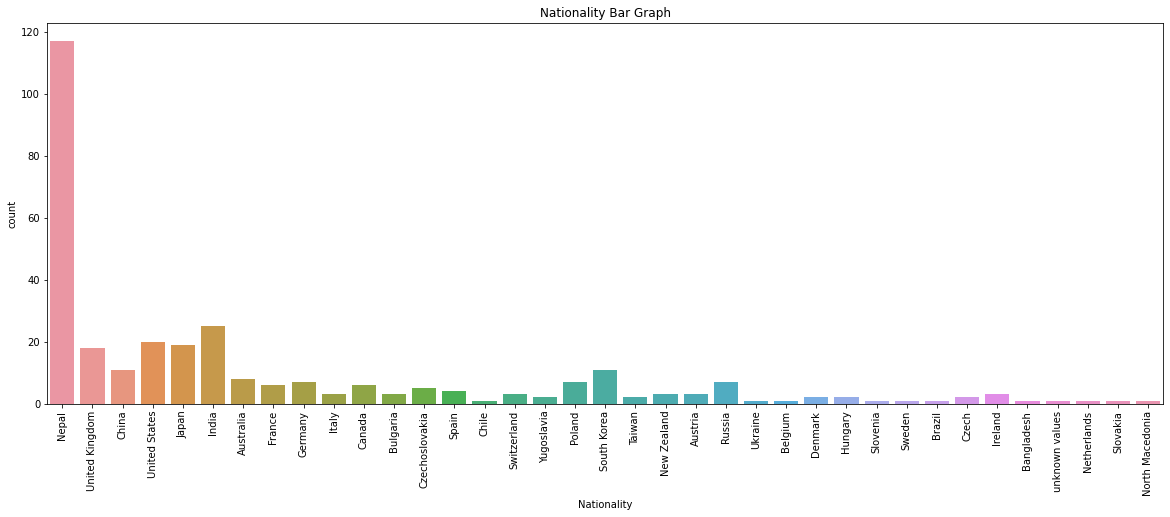

In [19]:
plt.figure(figsize=(20,7))
sns.countplot(x="Nationality", data=data)
plt.title('Nationality Bar Graph')
plt.xticks(rotation=90)
plt.show()

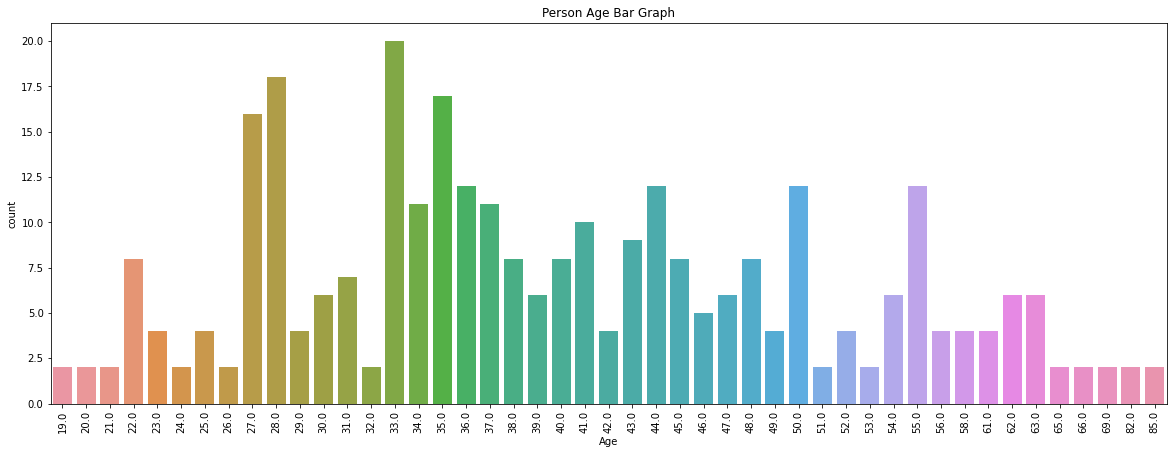

In [20]:
plt.figure(figsize=(20,7))
sns.countplot(x="Age", data=data)
plt.title('Person Age Bar Graph')
plt.xticks(rotation=90)
plt.show()

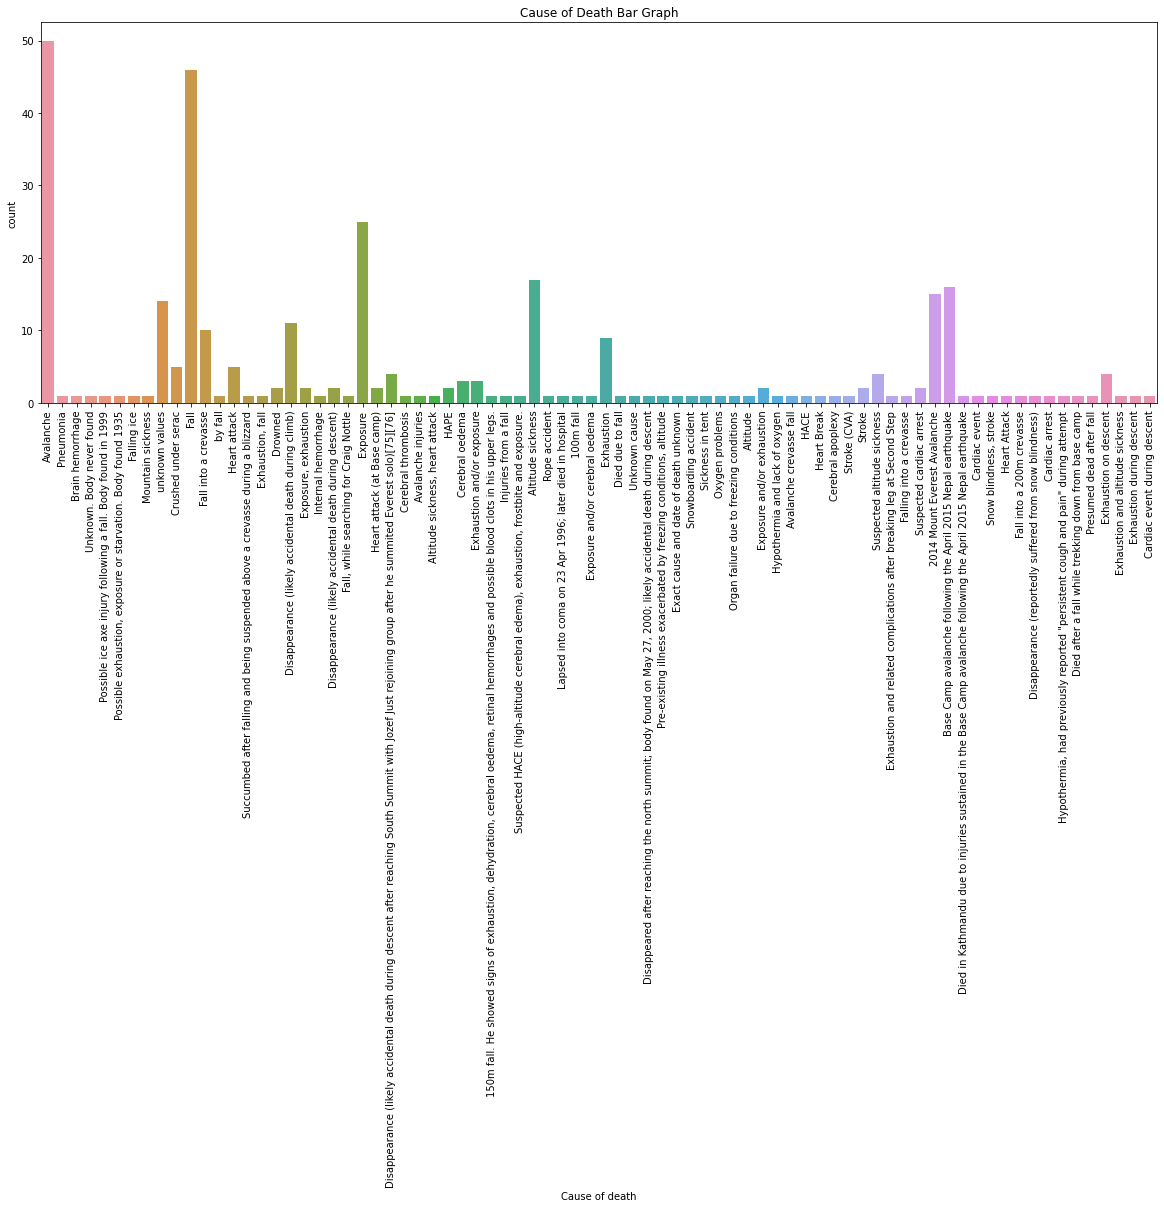

In [21]:
plt.figure(figsize=(20,7))
sns.countplot(x="Cause of death", data=data)
plt.title('Cause of Death Bar Graph')
plt.xticks(rotation=90)
plt.show()

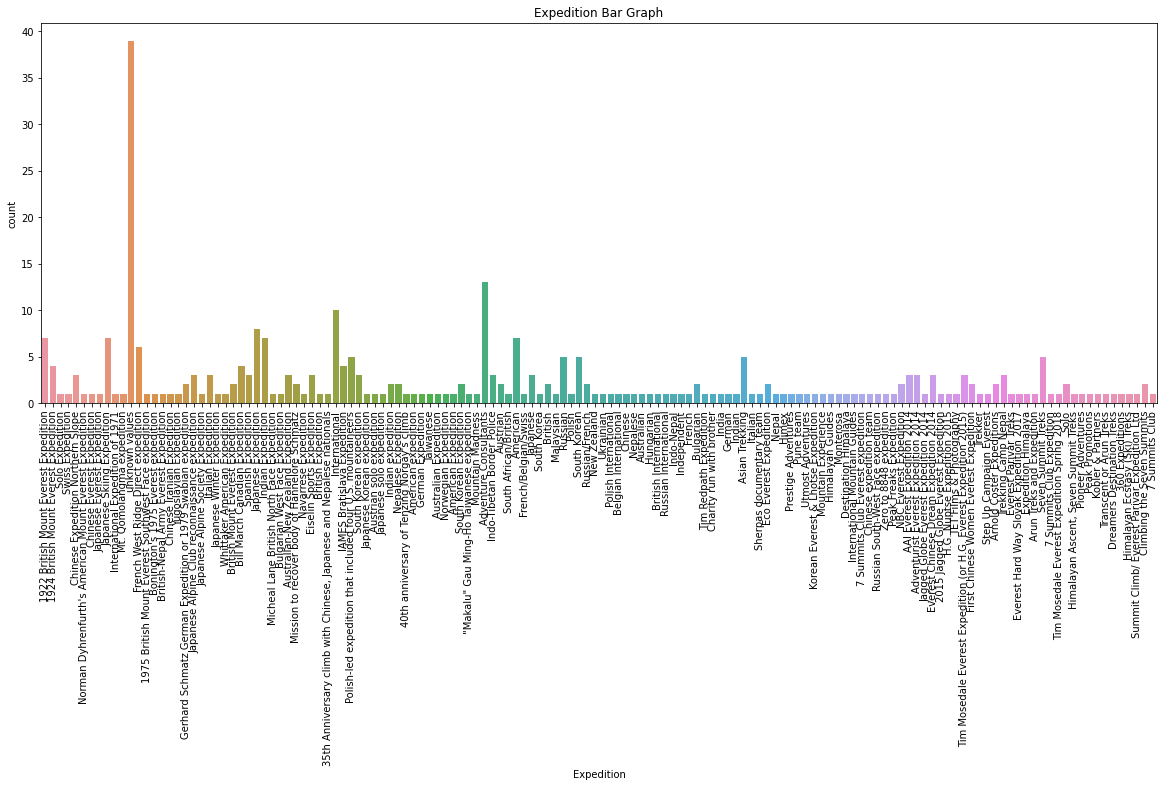

In [22]:
plt.figure(figsize=(20,7))
sns.countplot(x="Expedition", data=data)
plt.title("Expedition Bar Graph")
plt.xticks(rotation=90)
plt.show()

### Result Of EDA
* 1) According to the data in Nationality Nepal is the country that has taken part in Mt. Everest Climbing most number of times.
* 2) According to the data Average age of the Explores of Mt. Everest is 27-35 years in this 28 and 33 are the age of the most Climbers.
* 3) According to the data Avalanche, Fall, Exposure and Altitude Sickness are the most common way Climbers Die.